<a href="https://colab.research.google.com/github/Kathi3/friendly-disco/blob/main/ALX_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
# This is formatted as code
```

## 1.0 Importing our Library & Datasets
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-15,2947,7.3,2015,174799923.1,1.385749e+09


```
# This is formatted as code
```

## 2.0 Data Cleaning

```


**During this experience, a project on 3/5 datasets were used in different projects to try and build prowess but only the movie Analysis was submitted**

# Introduction
The dataset consists of several movies. The final idea that can be used for this datatset is to know:
1. The kind of entertainment the population likes based on the genre most liked.
2. Does this genres change from year to year? 
3. Is there a correlation between the most popular genre with the revenues?
4. Are there any other factors that influence the revenues?.
5. Can we recommend movies to invest in/for consumers to watch based on past trends of revenues earned/popularity trend?

Throughout this project, we will use numpy & pandas to analyse and matplotlib to visualize the relationships.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.drop(columns='homepage', inplace=True)

In [9]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [10]:
df.duplicated().sum()

1

In [11]:
df['genres'].value_counts(normalize = True)

Comedy                                      0.065664
Drama                                       0.065664
Documentary                                 0.028774
Drama|Romance                               0.026653
Comedy|Drama                                0.025823
                                              ...   
Adventure|Animation|Romance                 0.000092
Family|Animation|Drama                      0.000092
Action|Adventure|Animation|Comedy|Family    0.000092
Action|Adventure|Animation|Fantasy          0.000092
Mystery|Science Fiction|Thriller|Drama      0.000092
Name: genres, Length: 2039, dtype: float64

This shows the count of genres. The analysis shows Comedy and Drama Genres tie as genres with the highest value count.

In [12]:
df[['genres']].describe()

,genres
count,10843
unique,2039
top,Comedy
freq,712


In [13]:
df[['revenue', 'budget']].describe()

,revenue,budget
count,1.086600e+04,1.086600e+04
mean,3.982332e+07,1.462570e+07
std,1.170035e+08,3.091321e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.400000e+07,1.500000e+07
max,2.781506e+09,4.250000e+08




```
# This is formatted as code
```
## 3.0 Exploratory Analysis

```



In this section we plot graphs to see the relationships of different features/variables,to proof or disproof set notions, get a better understanding of the data and ultimately make recemmendations based on data analysis.

In [14]:
df['popularity'].corr(df['revenue'])

0.6633583664517384

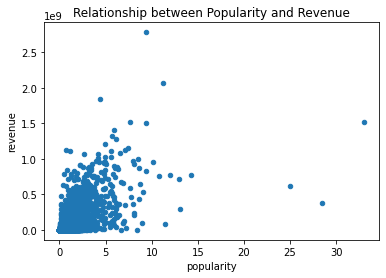

In [15]:
#Comparing 2 numerical categories
df.plot.scatter(x ='popularity', y= 'revenue')
plt.title('Relationship between Popularity and Revenue')
plt.show()

While not excessively high, we can tell there is a clear positive relation between the popularity of a movie and the revenue it yields ie, the more popular a genre is, the more revenue it yields.

In [16]:
df['budget'].corr(df['revenue'])

0.7349006819076115

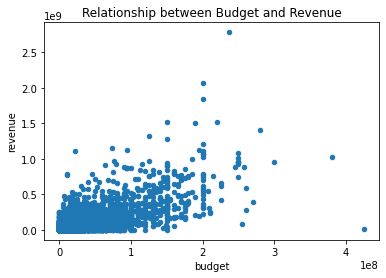

In [17]:
#Comparing 2 numerical categories
df.plot.scatter(x ='budget', y= 'revenue')
plt.title('Relationship between Budget and Revenue')
plt.show()

Higher than the relationship between popularity and revenue, we can tell there is a clear positive relation between the budget spared for a movie and the revenue it yields ie, the more finances injected to the production, the more revenue it yields.

In [18]:
df['runtime'].corr(df['revenue'])

0.1628378899826859

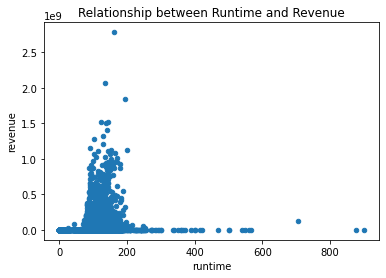

In [19]:
#Comparing 2 numerical categories
df.plot.scatter(x ='runtime', y= 'revenue')
plt.title('Relationship between Runtime and Revenue')
plt.show()

We can see there is barely any relationship between the runtime of a movie and the revenue it yields. There are factors that affcet the revenue much more.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


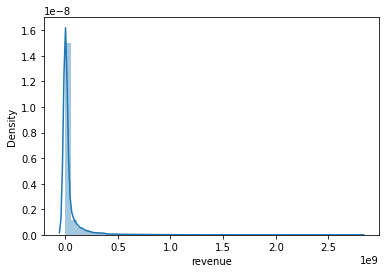

In [20]:
sns.distplot(df.revenue.dropna()) 

In [21]:
#Analysis of categorical variables
Deep_dive = df.select_dtypes(include='object').columns.to_list()
for col in Deep_dive:
  print(f'Column: {col}')
  print(df[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: imdb_id
tt0411951    2
tt3659388    1
tt1798684    1
tt1964418    1
tt1951266    1
            ..
tt0060955    1
tt0060214    1
tt0060371    1
tt0060472    1
tt0060666    1
Name: imdb_id, Length: 10855, dtype: int64
**********


Column: original_title
Hamlet                      4
Annie                       3
The Black Hole              3
Beauty and the Beast        3
Hercules                    3
                           ..
Paint Your Wagon            1
Jaws 2                      1
Superman                    1
Animal House                1
Manos: The Hands of Fate    1
Name: original_title, Length: 10571, dtype: int64
**********


Column: cast
Louis C.K.                                                                  6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei     5
Bill Burr                                                                   4
Pierre Coffin                                                               3
Chris Wedge           

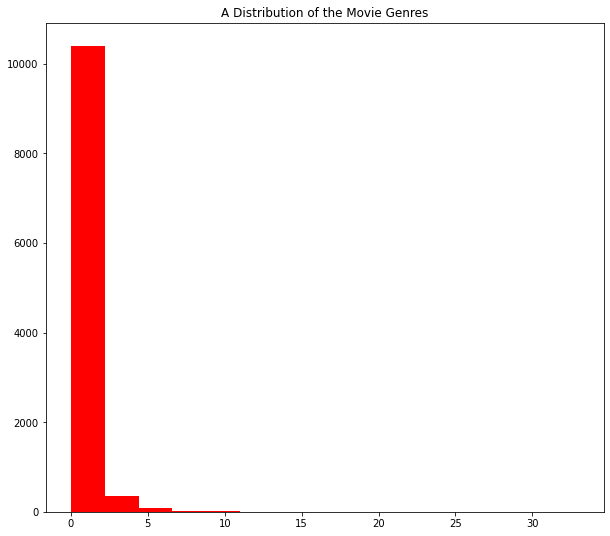

In [22]:
plt.figure(figsize=(10,9))
plt.hist(df["popularity"],bins=15,color="red")
plt.title('A Distribution of the Movie Genres')
plt.show()



```
# This is formatted as code
```
## Conclusions & Recommendations



# Conclusions

From the descriptibe analysis done on the data we can see there are features that have a correlation and help us answer the questions we set out to answer.

1. The kind of entertainment the population likes best - Drama & Comedy Genres tie for top spot.
2. Does this genres change from year to year? Unable to determine since the data is not split into years. As such there is need for a more descriptive data to be able to study the trend and perform time series.
3. Is there a correlation between the most popular genre with the revenues? Yeas. A genre thatis highly pupular tends to earn more revenues.
4. Are there any other factors that influence the revenues?. There are factors that also seem to lead to ana increase in reveneues eg. budget. When more finances are allocated to a genre, the returns it yields are also high. An equivalent pay day
5. Can we recommend movies to invest in/for consumers to watch based on past trends of revenues earned/popularity trend? Yes but with a curvature. We can recommend movies to watch based on past popularity but there is need to apply machine learning algorithms to predict the trend in terms of customers and investors.


# Recommendation
While descriptibe analysis forms a basis to undersand the data, there is a need to apply more sophisticated algorithms to have more solid predictions

# Followup Questions

Is the data complete and right? No
The data could have been better. The missing values and lack of columns that culd have added important information lead to a half baked analysis.